
Лабораторная работа 3.2
Вариант 2:
X* = -0.5
i :       0       1       2        3        4
Xi:       0       1       2        3        4
Fi:       1    0.86603   0.5       0      -0.5


Начальная функция сплайна:
h is:  [0, 1, 1, 1, 1]
a is:  [0, 1, 0.86603, 0.5, 0]
b is:  [0, -0.0814, -0.2391, -0.462, -0.5109]
c is:  [0, 0, -0.15777, -0.0651, 0.01628]
d is:  [0, -0.05259, 0.03089, 0.02713, -0.00543] 


Значение функции в точке X*:
F(1.5) = 0.7108987499999999


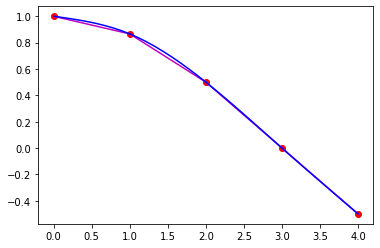

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

target = """X* = -0.5
i :       0       1       2        3        4
Xi:       0       1       2        3        4
Fi:       1    0.86603   0.5       0      -0.5
"""


def get_h(x, i):
    return x[i] - x[i - 1]


def func(a, b, c, d, x):
    return a + b * x + c * (x ** 2) + d * (x ** 3)


def get_a(f):
    return [0] + [f[i] for i in range(len(f) - 1)]


def get_b(f, c, h):
    n = len(f) - 1
    b = [0]

    for i in range(1, n):
        b.append((f[i] - f[i - 1]) / h[i] - 1 / 3 * h[i] * (c[i + 1] + 2 * c[i]))

    b.append((f[n] - f[n - 1]) / h[n] - 2 / 3 * h[n] * c[n])
    return [round(i, 4) for i in b]


def tma(a, b, c, d):
    size = len(a)
    p, q = [], []
    p.append(-c[0] / b[0])
    q.append(d[0] / b[0])

    for i in range(1, size):
        p_tmp = -c[i] / (b[i] + a[i] * p[i - 1])
        q_tmp = (d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1])
        p.append(p_tmp)
        q.append(q_tmp)

    x = [0 for _ in range(size)]
    x[size - 1] = q[size - 1]

    for i in range(size - 2, -1, -1):
        x[i] = p[i] * x[i + 1] + q[i]

    return x


def get_c(f, h):
    n = len(f)
    a = [0] + [h[i - 1] for i in range(3, n)]
    b = [2 * (h[i - 1] + h[i]) for i in range(2, n)]
    c = [h[i] for i in range(2, n - 1)] + [0]
    d = [3 * ((f[i] - f[i - 1]) / h[i] - ((f[i - 1] - f[i - 2]) / h[i - 1])) for i in range(2, n)]
    x = tma(a, b, c, d)
    res = [0, 0] + [round(i, 5) for i in x]
    return res


def get_d(h, c):
    n = len(c) - 1
    d = [0]
    for i in range(1, n):
        d.append((c[i + 1] - c[i]) / (3 * h[i]))
    d.append(-c[n] / (3 * h[n]))
    return [round(i, 5) for i in d]


def get_interval(x, x_check):
    for i in range(len(x) - 1):
        if x[i] <= x_check <= x[i + 1]:
            return i


def spline(x, f, x_check):
    n = len(x)
    h = [0]
    for i in range(1, n):
        h.append(get_h(x, i))
    a = get_a(f)
    c = get_c(f, h)
    b = get_b(f, c, h)
    d = get_d(h, c)
    print('h is: ', h)
    print('a is: ', a)
    print('b is: ', b)
    print('c is: ', c)
    print('d is: ', d, '\n')

    tmp = get_interval(x, x_check)

    ans = func(a[tmp + 1], b[tmp + 1], c[tmp + 1], d[tmp + 1], x_check - x[tmp])
    return ans, a, b, c, d


def show_plot(x, f, a, b, c, d):
    X, Y = [], []
    for i in range(len(x) - 1):
        x_i = np.linspace(x[i], x[i + 1], 10, endpoint=True)
        y_i = [func(a[i + 1], b[i + 1], c[i + 1], d[i + 1], j - x[i]) for j in x_i]
        X.append(x_i)
        Y.append(y_i)

    fig, ax = plt.subplots()
    ax.scatter(x, f, color='r')
    ax.plot(x, f, color='m')
    for i in range(len(x) - 1):
        ax.plot(X[i], Y[i], color='b')
    plt.savefig('spline.png')
    plt.show()


if __name__ == '__main__':
    print('\nЛабораторная работа 3.2\nВариант 2:')
    print(target)
    x_i = [0, 1, 2, 3, 4]
    f_i = [1, 0.86603, 0.5, 0, -0.5]
    x_check = 1.5
    print('\nНачальная функция сплайна:')
    y, a, b, c, d = spline(x_i, f_i, x_check)
    print('\nЗначение функции в точке X*:')
    print(f'F({x_check}) = {y}')
    show_plot(x_i, f_i, a, b, c, d)